# Testing the driver code

In [15]:
import sys
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code')
from EBLSST import LSSTEBworker, OpSim, TRILEGAL
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


*I will do this before initializing the worker, because then I only need to do it once for all processes*

In [38]:
worker = LSSTEBworker()

In [39]:
OpS = OpSim()
OpS.dbFile = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/db/minion_1016_sqlite.db' #for the OpSim database	
OpS.getAllOpSimFields()


getting OpSim fields...
have summary cursor.
have field cursor.
returned 5292 fields


In [ ]:
worker.OpSim = OpS

i = 3456
passed = worker.initialize(OpSimi=i) #Note: this will not redo the OpSim class, because we've set it above
print(passed)

### Test the output

In [21]:
import corner

from matplotlib import pyplot as plt
#%matplotlib notebook
%matplotlib inline


#some function to make plots (will re-use them later)
#to plot the chains
def plotChains(sampler, nburn, paramsNames):
    Nparams = len(paramsNames)
    fig, ax = plt.subplots(Nparams,1, figsize = (8,2*Nparams), sharex = True)
    fig.subplots_adjust(hspace = 0)
    ax[0].set_title('Chains')
    xplot = range(len(sampler.chain[0,:,0]))

    for i,p in enumerate(paramsNames):
        for w in range(sampler.chain.shape[0]):
            ax[i].plot(xplot[:nburn], sampler.chain[w,:nburn,i], color="0.5", alpha = 0.4, lw = 0.7, zorder = 1)
            ax[i].plot(xplot[nburn:], sampler.chain[w,nburn:,i], color="k", alpha = 0.4, lw = 0.7, zorder = 1)
            
            ax[i].set_ylabel(p)
            
    return ax

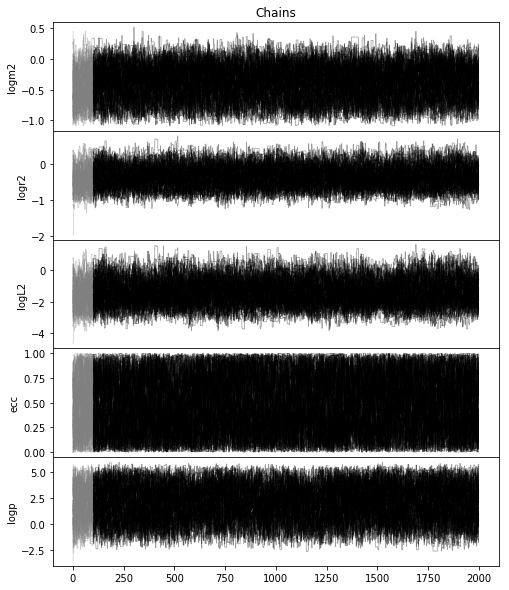

In [22]:
outNames = ['logm2', 'logr2', 'logL2', 'ecc', 'logp']
axC = plotChains(worker.emcee_sampler, worker.emcee_nburn, outNames)

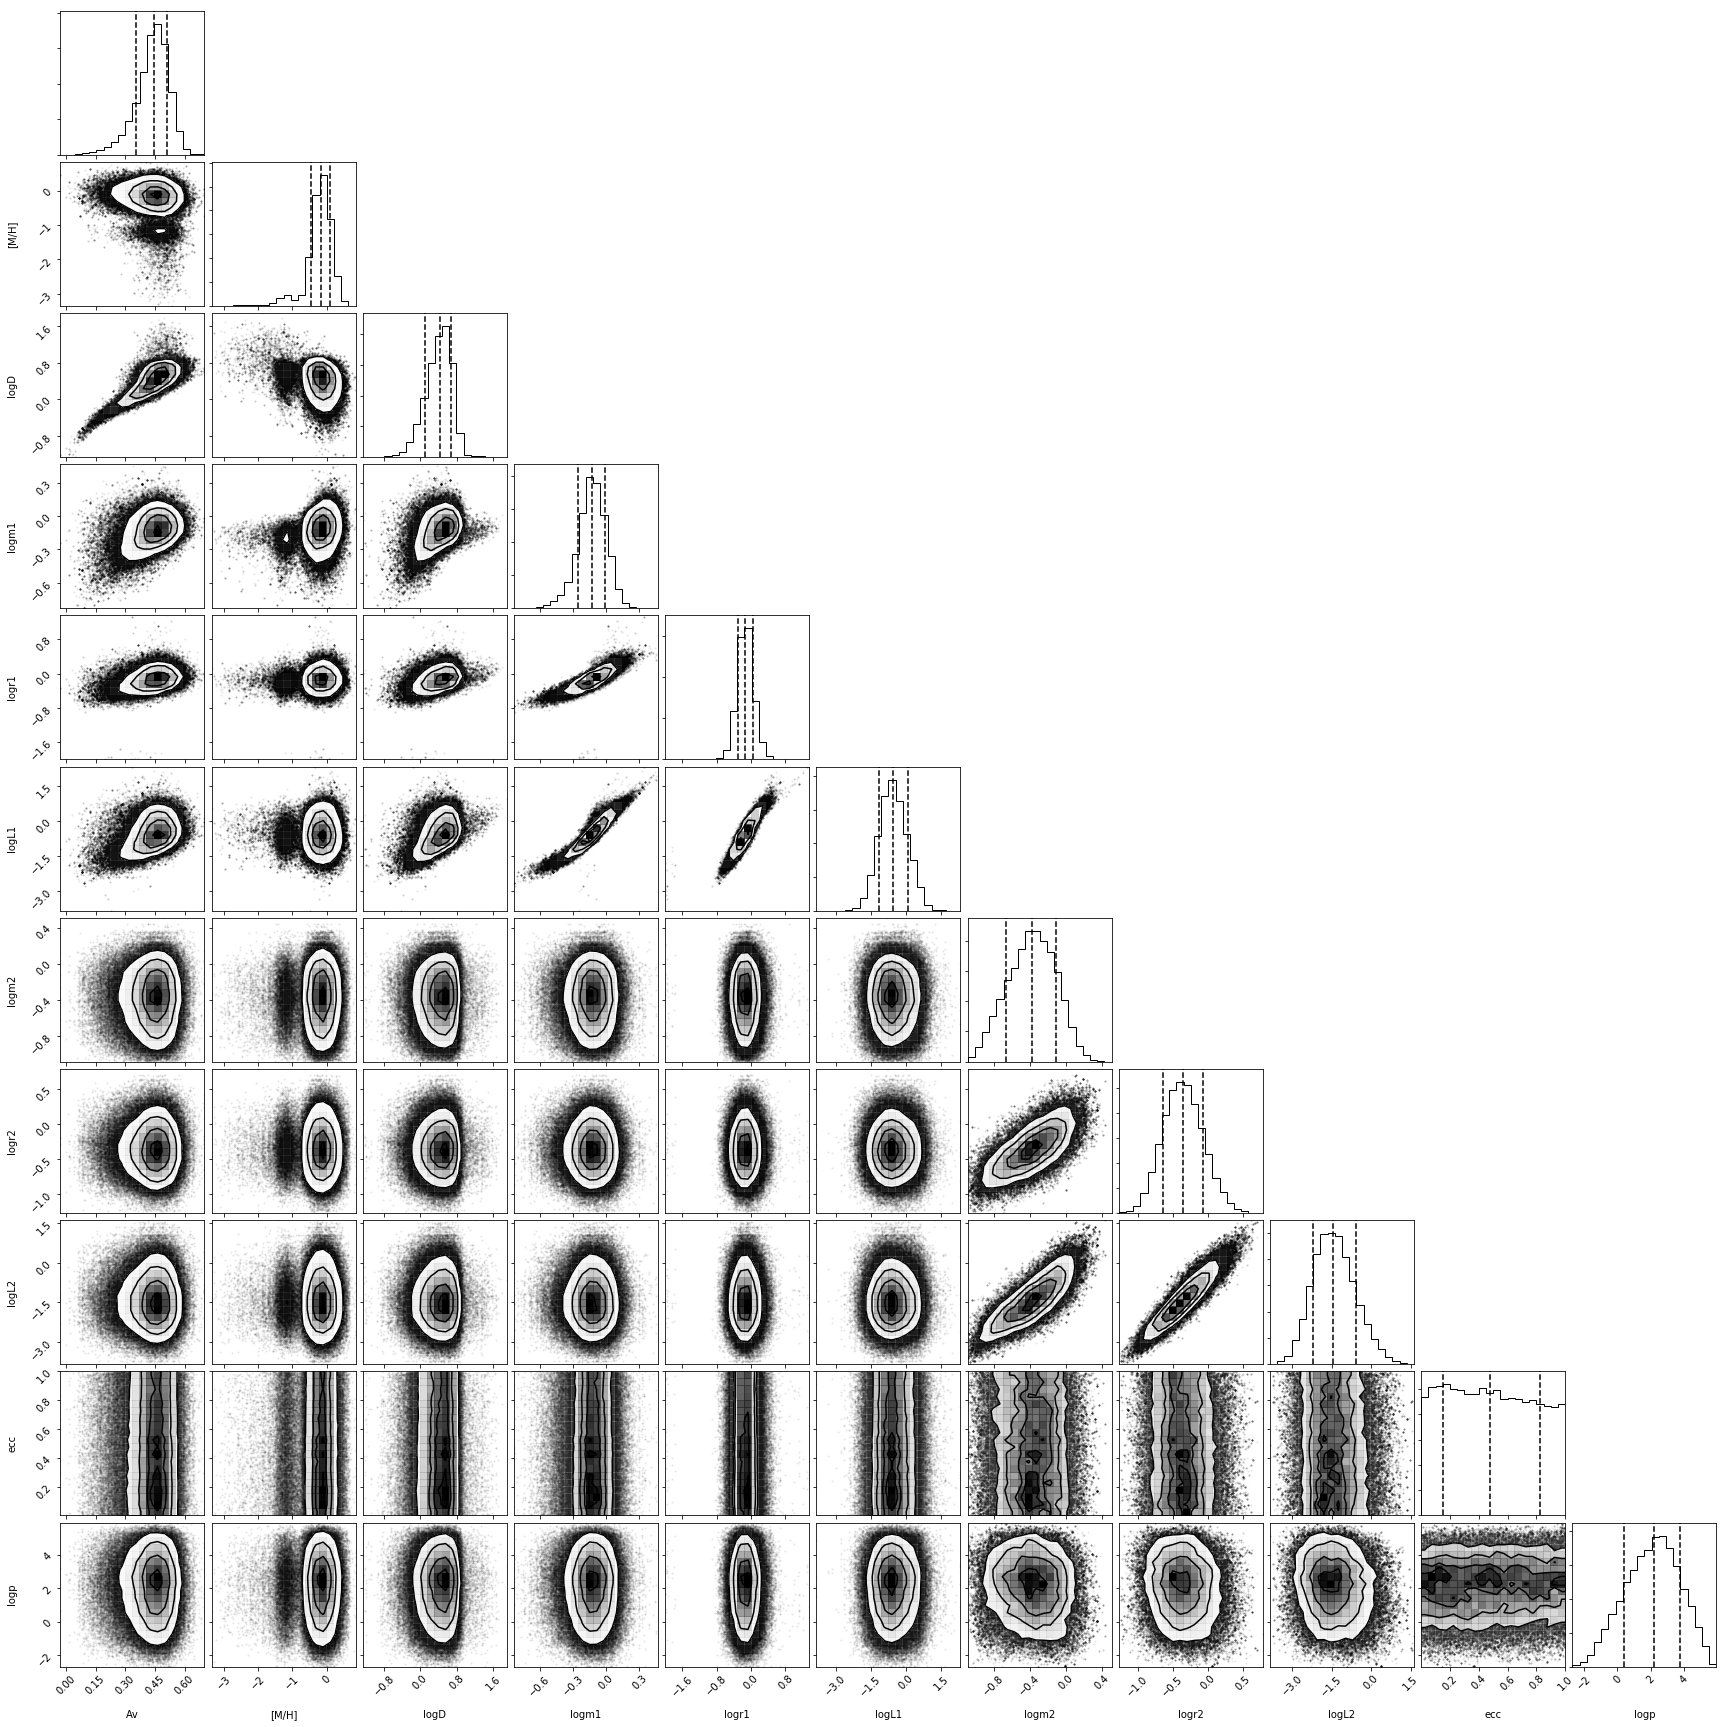

In [23]:
outNames = ['Av', '[M/H]', 'logD', 'logm1', 'logr1', 'logL1', 'logm2', 'logr2', 'logL2', 'ecc', 'logp']
f = corner.corner(worker.BreivikGal, labels = outNames, quantiles = [0.16, 0.5, 0.84])

In [37]:
worker.filterFilesRoot = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/filters/'
worker.n_bin = 1
line = worker.sampleBreivikGal()
EB = worker.getEB(line, 0)

#TO TEST
EB.inclination = 90.

print(EB.period, EB.inclination, EB.R_1, EB.R_2, EB.sbratio, EB.q)
i = 3456
print(worker.OpSim.obsDates)
worker.OpSim.setDates(i, worker.filters)
fig,ax = plt.subplots(6,1, figsize=(6,8))
for i,f in enumerate(worker.filters):
    EB.observe(f)
    print(EB.obsDates)
    ax[i].plot((EB.obsDates[f] % EB.period), EB.appMag[f],'.', color='red')
    ax[i].plot((EB.obsDates[f] % EB.period), EB.appMagObs[f],'.', alpha=0.3, color='blue')
    ax[i].set_ylim(max(EB.appMagObs[f]), min(EB.appMagObs[f]))
    ax[i].set_ylabel(f)

365.47669660318354 90.0 0.005191322879157698 0.001940806138501895 0.33865623554470714 0.6972849233208896
[{'u_': [None], 'g_': [None], 'r_': [None], 'i_': [None], 'z_': [None], 'y_': [None]}
 {} {} ... {} {} {}]


IndexError: invalid index to scalar variable.